In [7]:
%matplotlib inline

import sys
import pywt
import numpy as np
import scipy as sp
import sympy as sym
import numexpr as ne
import matplotlib.pyplot as plt


#import of acalib helper functions
sys.path.append('/home/martin/Repositories/ACALIB')
from acalib import acontainer as ac
from acalib.io import graph as gp

In [225]:
"""
Loading data
"""
cont = ac.AContainer()
#cont.load('/home/martin/Repositories/bindata/fits/cubes/Antennae_North.CO3_2Line.Clean.pcal1.image.fits')
#cont.load('/home/martin/Repositories/bindata/fits/cubes/Antennae_South.CO3_2Line.Clean.pcal1.image.fits')
#cont.load('/home/martin/Repositories/bindata/fits/cubes/CenA.CO2_1Line.Clean.image.fits')
#cont.load('/home/martin/Repositories/bindata/fits/cubes/M100line.image.fits')
cont.load('/home/martin/Repositories/bindata/fits/cubes/Orion.methanol.cbc.contsub.image.fits')

cube = cont.primary
spar = cube.standarize()
data = cube.data
data = data.filled(fill_value=0)
data = data[:,18:82,18:82]

INFO: Processing HDU 0 (Image) [acalib.io.formats]
INFO: 4D data detected: assuming RA-DEC-FREQ-STOKES (like CASA-generated ones), and dropping STOKES [acalib.io.formats]


In [226]:
def plot_helper(data, freqs=range(0,40,4)):
    fig = plt.figure(figsize=(17,9))
    count = 1
    for f in freqs:
        slc = data[f]
        fig.add_subplot(2,5,count)
        plt.imshow(slc)
        plt.axis('off')
        plt.title('Slice at freq={0}'.format(f))
        count += 1
    plt.show()

In [227]:
data08 = data[8]
data16 = data[16]
data24 = data[24]
data32 = data[32]

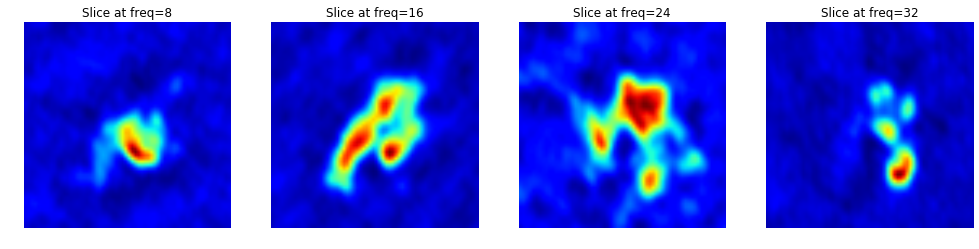

In [228]:
fig = plt.figure(figsize=(17,9))
fig.add_subplot(1,4,1)
plt.imshow(data08)
plt.axis('off')
plt.title('Slice at freq=8')
fig.add_subplot(1,4,2)
plt.imshow(data16)
plt.axis('off')
plt.title('Slice at freq=16')
fig.add_subplot(1,4,3)
plt.imshow(data24)
plt.axis('off')
plt.title('Slice at freq=24')
fig.add_subplot(1,4,4)
plt.imshow(data32)
plt.axis('off')
plt.title('Slice at freq=32')
plt.show()

In [285]:
wt08_1 = pywt.swt2(data08, 'haar', 6)[1][0]
wt16_1 = pywt.swt2(data16, 'haar', 6)[1][0]
wt24_1 = pywt.swt2(data24, 'haar', 6)[1][0]
wt32_1 = pywt.swt2(data32, 'haar', 6)[1][0]

wt08_3 = pywt.swt2(data08, 'haar', 6)[2][0]
wt16_3 = pywt.swt2(data16, 'haar', 6)[2][0]
wt24_3 = pywt.swt2(data24, 'haar', 6)[2][0]
wt32_3 = pywt.swt2(data32, 'haar', 6)[2][0]

wt08_5 = pywt.swt2(data08, 'haar', 6)[3][0]
wt16_5 = pywt.swt2(data16, 'haar', 6)[3][0]
wt24_5 = pywt.swt2(data24, 'haar', 6)[3][0]
wt32_5 = pywt.swt2(data32, 'haar', 6)[3][0]

wt08_4 = pywt.swt2(data08, 'haar', 6)[4][0]
wt16_4 = pywt.swt2(data16, 'haar', 6)[4][0]
wt24_4 = pywt.swt2(data24, 'haar', 6)[4][0]
wt32_4 = pywt.swt2(data32, 'haar', 6)[4][0]

In [264]:
type(wt08_1)

numpy.ndarray

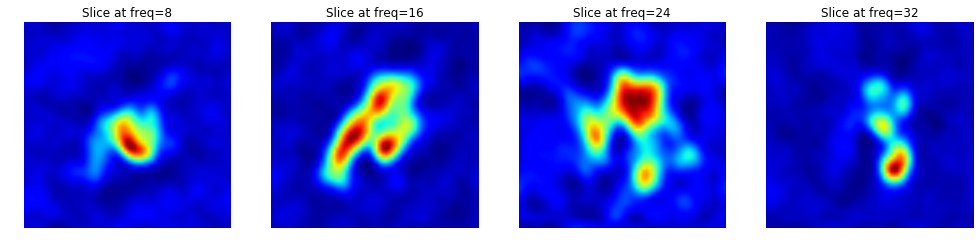

In [265]:
fig = plt.figure(figsize=(17,9))
fig.add_subplot(1,4,1)
plt.imshow(wt08_1)
plt.axis('off')
plt.title('Slice at freq=8')
fig.add_subplot(1,4,2)
plt.imshow(wt16_1)
plt.axis('off')
plt.title('Slice at freq=16')
fig.add_subplot(1,4,3)
plt.imshow(wt24_1)
plt.axis('off')
plt.title('Slice at freq=24')
fig.add_subplot(1,4,4)
plt.imshow(wt32_1)
plt.axis('off')
plt.title('Slice at freq=32')
plt.show()

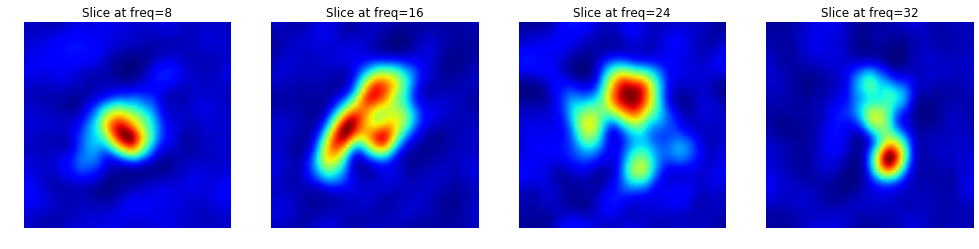

In [266]:
fig = plt.figure(figsize=(17,9))
fig.add_subplot(1,4,1)
plt.imshow(wt08_3)
plt.axis('off')
plt.title('Slice at freq=8')
fig.add_subplot(1,4,2)
plt.imshow(wt16_3)
plt.axis('off')
plt.title('Slice at freq=16')
fig.add_subplot(1,4,3)
plt.imshow(wt24_3)
plt.axis('off')
plt.title('Slice at freq=24')
fig.add_subplot(1,4,4)
plt.imshow(wt32_3)
plt.axis('off')
plt.title('Slice at freq=32')
plt.show()

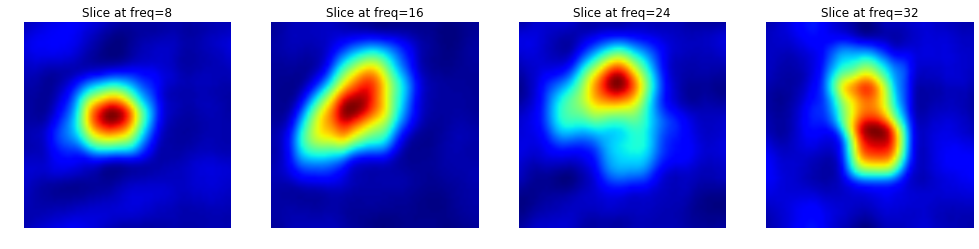

In [267]:
fig = plt.figure(figsize=(17,9))
fig.add_subplot(1,4,1)
plt.imshow(wt08_5)
plt.axis('off')
plt.title('Slice at freq=8')
fig.add_subplot(1,4,2)
plt.imshow(wt16_5)
plt.axis('off')
plt.title('Slice at freq=16')
fig.add_subplot(1,4,3)
plt.imshow(wt24_5)
plt.axis('off')
plt.title('Slice at freq=24')
fig.add_subplot(1,4,4)
plt.imshow(wt32_5)
plt.axis('off')
plt.title('Slice at freq=32')
plt.show()

In [256]:
asdf = pywt.swt2(data08, 'haar', 6)

In [271]:
from numpy import mean, sqrt, square, arange

In [291]:
rms08_1 = sqrt(mean(square(wt08_1)))
rms16_1 = sqrt(mean(square(wt16_1)))
rms24_1 = sqrt(mean(square(wt24_1)))
rms32_1 = sqrt(mean(square(wt32_1)))

In [292]:
wt08_1[wt08_1 < rms08_1] = 0
wt16_1[wt16_1 < rms16_1] = 0
wt24_1[wt24_1 < rms24_1] = 0
wt32_1[wt32_1 < rms32_1] = 0

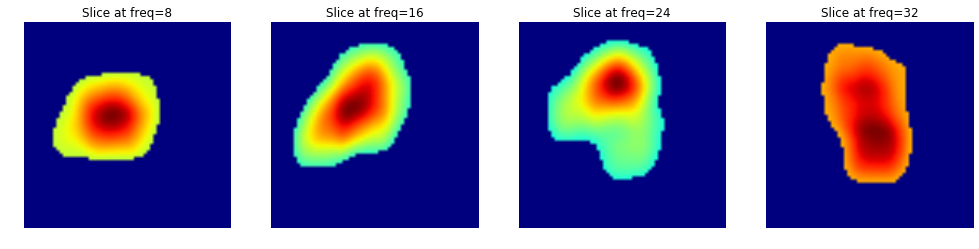

In [289]:
fig = plt.figure(figsize=(17,9))
fig.add_subplot(1,4,1)
plt.imshow(wt08_5)
plt.axis('off')
plt.title('Slice at freq=8')
fig.add_subplot(1,4,2)
plt.imshow(wt16_5)
plt.axis('off')
plt.title('Slice at freq=16')
fig.add_subplot(1,4,3)
plt.imshow(wt24_5)
plt.axis('off')
plt.title('Slice at freq=24')
fig.add_subplot(1,4,4)
plt.imshow(wt32_5)
plt.axis('off')
plt.title('Slice at freq=32')
plt.show()

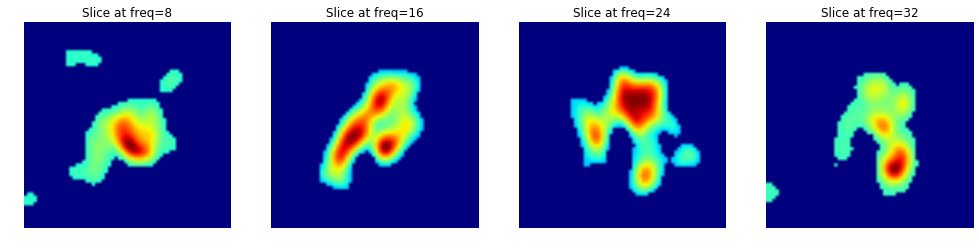

In [293]:
fig = plt.figure(figsize=(17,9))
fig.add_subplot(1,4,1)
plt.imshow(wt08_1)
plt.axis('off')
plt.title('Slice at freq=8')
fig.add_subplot(1,4,2)
plt.imshow(wt16_1)
plt.axis('off')
plt.title('Slice at freq=16')
fig.add_subplot(1,4,3)
plt.imshow(wt24_1)
plt.axis('off')
plt.title('Slice at freq=24')
fig.add_subplot(1,4,4)
plt.imshow(wt32_1)
plt.axis('off')
plt.title('Slice at freq=32')
plt.show()